In [1]:
import os
import re
import statistics
from src.najdi_rok import najdi_rok
import pandas as pd
pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 500)
df = pd.read_parquet("data/cnb_vyber.parquet")
df['rok'] = df["008"].apply(lambda x: najdi_rok(x))
df = df[df['rok'].notnull()]
df = df[df['100_7'].notnull()]

In [11]:
df['245_a'] = df['245_a'].apply(lambda x: x[:-1].strip())

In [28]:
def hledej(reg):
    return df[df['245_a'].str.contains(reg,na=False,regex=True)][['100_a','245_a','rok']].drop_duplicates(subset=['100_a','245_a']).sort_values(by='rok')

In [30]:
hledej('Reportáž psaná')

,100_a,245_a,rok
001,,,
bk194500456,"Fučík, Julius,",Reportáž psaná na oprátce,1945.0
bk195003015,"Fučík, Julius,",Reportáž psaná na oprátce ve vězení gestapa na...,1950.0
bk195101591,"Fučík, Julius,",Reportáž psaná na oprátce (ve vězení gestapa n...,1951.0
nkc20061654064,"Petlach, Oldřich,",Reportáž psaná na vandru,2006.0
nkc20071728606,"Petlach, Oldřich,",Reportáž psaná na vandru II,2007.0
nkc20172889079,"Hájek, Petr P.,",Reportáž psaná na obrátce,2014.0
nkc20213368042,"Hornová, Libuše,",Reportáž psaná na fidorce,2022.0
nkc20233498589,"Štěpánek, Petr,",Reportáž psaná po popravě,2022.0


In [34]:
hledej(r'[Pp]od \w* vlajk')

,100_a,245_a,rok
001,,,
bk193202798,"Ossendowski, Ferdynand Antoni,",Pod polskou vlajkou,1931.0
bk193706560,"Kalina, Jaroslav,","Pod československou vlajkou ve Francii, Belgii...",1935.0
bk194000889,"Foglar, Jaroslav,",Pod junáckou vlajkou,1940.0
bk194903455,"Schäfer, Jarolím,",Pod československou vlajkou,1949.0
cpk20122346571,"Vavroušek, Václav",Pod rudou vlajkou,1980.0
ck8303542,"Možejko, Igor' Vsevolodovič,",Pod pirátskou vlajkou,1983.0
np9306370,"Boyd, William,",Pod hvězdnatou vlajkou,1992.0
cpk19980296811,"Darlton, Clark,",Pod nepravou vlajkou,1997.0
cpk19990692389,"Pečínka, Pavel,",Pod rudou vlajkou proti KSČ,1999.0


In [36]:
hledej(r'Bylo nás')

,100_a,245_a,rok
001,,,
bk194602377,"Poláček, Karel,",Bylo nás pět,1946.0
bk196100688,"Kachlík, Antonín,",Bylo nás deset,1961.0
bk196801361,"Lojko, Natalija Vsevolodovna,",Bylo nás osmnáct,1968.0
cpk20000969500,"Poláček, Karel,",Bylo nás 5,2000.0
nkc20041413507,"Tesařík, Richard,",Bylo nás dva,2004.0


In [38]:
hledej(r'o \w* nemluvě')

,100_a,245_a,rok
001,,,
bk192902000,"Jerome, Jerome K.",Tři muži ve člunu [o psu nemluvě],1929.0
bk194802717,"Jerome, Jerome K.",Tři muži ve člunu (o psu nemluvě),1948.0
bk195800702,"Jerome, Jerome K.",Tři muži v člunu o psu nemluvě,1957.0
bk196604507,"Jerome, Jerome K.",Tři muži ve člunu o psu nemluvě,1966.0
ck9100482,"Šrut, Pavel,",Dva lelci ve skříni o Karlíkovi nemluvě,1990.0
nkc20122371329,"Šmejdová, Ivana,","Tři ve Fanče, o Lindě nemluvě",2012.0
nkc20122429110,"Willis, Connie,",--o psu nemluvě,2012.0
nkc20183059584,"Martin, Eduard,","Chceš být král?, (aneb, Vesmírné krávství), či...",2018.0


In [46]:
hledej(r'[Ss]lepičí pol[éí]vka pro')

,100_a,245_a,rok
001,,,
cpk19970286206,"Canfield, Jack,",Slepičí polévka pro duši,1997.0
cpk19980304739,"Canfield, Jack,","Slepičí polévka pro duši, kuchařka",1997.0
cpk20010538404,"McCourt, Lisa",Slepičí polévka pro dětskou duši,1998.0
cpk20010655832,"Canfield, Jack,",Slepičí polévka pro duši teenagera,1999.0
cpk20000968848,"Hansen, Mark Victor,",Slepičí polévka pro ženskou duši,2000.0
cpk20010888424,"Crha, Richard,",Slepičí polévka pro duši českého rodiče,2001.0
cpk20040891246,"Canfield, Jack,",Klasická slepičí polévka pro duši,2001.0
nkc20051629412,"Canfield, Jack,",Slepičí polévka pro inspiraci ženské duše,2005.0
nkc20081803972,"Canfield, Jack,",Slepičí polévka pro pracující mámu,2008.0


In [52]:
hledej('Já vím')

,100_a,245_a,rok
001,,,
cpk19960096204,"Kořínková, Lenka,",Dieta? Já vím,1995.0
cpk20021182420,"Dědková, Jarmila,","Kukačka, aneb, Já vím své",2002.0
cpk20213320577,"Iždinská, Naděžda",Neuvěřitelné? Já vím...,2014.0
nkc20243613490,"Brůna, Jiří,","Já vím, aneb, Život básnického solitéra",2024.0


In [56]:
hledej('[Kk]am s ním')

,100_a,245_a,rok
001,,,
bk194102405,"Neruda, Jan,",Kam s ním?,1941.0
ck8603784,"Tománek, Alois,",Kam s ním? aneb Máte doma medvěda?,1986.0
np9535420,"Haller, Lilo",Kam s ním?,1995.0
nkc20102119595,"Dittrich, Vítězslav",Kam s ním???,2010.0


In [58]:
hledej('Most přes')

,100_a,245_a,rok
001,,,
bk194805318,"Andrić, Ivo,",Most přes Drinu,1948.0
bk196403370,"Boulle, Pierre,",Most přes řeku Kwai,1964.0
bk196605099,"Pros, Josef",Most přes Manzanares,1966.0
ck8605755,"Rosenbaum, Zdeněk,",Most přes zlou vodu,1986.0
cpk19970213041,"Stýblová, Valja,",Most přes řeku Léthé,1997.0
cpk20010602860,"Bach, Richard,",Most přes navždy,1999.0
nkc20061654089,"Kantůrková, Eva,",Most přes Dlouhou řeku,2006.0
nkc20152698842,"Pejčoch, Miroslav",Most přes dvě řeky,2015.0
nkc20152729700,"Čejka, Jaroslav,",Most přes řeku zapomnění,2015.0


In [60]:
hledej(' do stanice')

,100_a,245_a,rok
001,,,
ck9002398,"Krapivin, Vladislav Petrovič,",Vlak do stanice Nekonečno,1990.0
cpk19980371854,"Bolten, Yvonne",Start do stanice štěstí,1998.0
cpk20041297556,"Williams, Tennessee,",Tramvaj do stanice Touha,2003.0
nkc20071749067,"Pavel, Jan,",Tramvaj do stanice,2007.0
nkc20183021276,"Larsen, Viola",Cesta do stanice láska,2018.0
nkc20203177912,"Hadj Moussa, Iva,",Šalina do stanice touha,2020.0
nkc20213323021,"Dostál, František,","Nádraží Braník, aneb, Vlak do stanice touha",2021.0


In [62]:
hledej(r'přes \w* (k|ke) \w*')

C:\Users\micha\AppData\Local\Temp\ipykernel_3600\3420459.py:2: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  return df[df['245_a'].str.contains(reg,na=False,regex=True)][['100_a','245_a','rok']].drop_duplicates(subset=['100_a','245_a']).sort_values(by='rok')


,100_a,245_a,rok
001,,,
nos190124253,"Kubišta, Antonín","Z Plzně přes Klatovy k Šumavským jezerům, do E...",1910.0
bk195500049,"Morgan, Lewis Henry,","Pravěká společnost, neboli, Výzkumy o průběhu ...",1954.0
nkc20081832968,"Mykiska, Martin,",Jižní Amerikou přes Patagonii k Orinoku,2008.0
nkc20183028076,"Klíma, Milan,",Od střízlíka přes člověka k vorvaňovi,2018.0


In [64]:
hledej(r'Od \w* (k|ke) \w*')

C:\Users\micha\AppData\Local\Temp\ipykernel_3600\3420459.py:2: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  return df[df['245_a'].str.contains(reg,na=False,regex=True)][['100_a','245_a','rok']].drop_duplicates(subset=['100_a','245_a']).sort_values(by='rok')


,100_a,245_a,rok
001,,,
nos190125266,"Laurenčič, Julius",Od Tater k Adrii,1901.0
nos190107233,"David, Vilda,",Od srdce k srdcím,1902.0
nos190254877,"Vřesnický, Jan,",Od země k obloze,1907.0
nos190108134001,"Dostál, Alois,",Od starého k mladému posvícení,1910.0
nos190247020,"Svoboda, Vladimír,",Od sněženky k ocúnu,1910.0
nos190103574,"Bogner, Adolf,",Od knihy k životu nebo Květina bez vůně,1911.0
nos190124209,"Kubička, Josef,",Od srdce k srdéčku,1913.0
nos190231333,"Nečas, Jan Evangelista,",Od srdce k srdci,1913.0
nos190123150,"Kramer, Georg",Od buňky k ssavci,1914.0


In [66]:
hledej(r'[O]sudy .* za')

,100_a,245_a,rok
001,,,
cpk20193122673,"Prášek, Karel,",Osudy československého zemědělství za války a ...,1919.0
bkn20010577999,"Klofáč, Václav Jaroslav,",Osudy branné moci československé za prvního mi...,1920.0
bk192604341,"Hašek, Jaroslav,",Osudy dobrého vojáka Švejka za světové války,1926.0
nkc20152733458,"Vaněk, Karel,",Osudy dobrého vojáka Švejka v ruském zajetí,1927.0
bk192900175,"Bartoš, Felix,",Osudy dobrého vojáka Švejka v ruském zajetí,1929.0
bk197501128,"Mariánková, Jana,",Osudy dětí a mládeže za 2. světové války,1974.0
ck9201381,"Lukeš, Jan,","Co byl Paxistický puč v Praze o vánocích 1945,...",1991.0
nkc20051580471,"Šmejkal, Jaroslav,","Kolonka, aneb, Osudy lidí za protektorátu",2005.0
nkc20051584616,"Kulíšková, Šárka,",Osudy horeckých vojáků za první světové války,2005.0


In [68]:
hledej(r'Kdo zabil')

,100_a,245_a,rok
001,,,
bknhak03298,"Karas, Josef František,",Kdo zabil--,1928.0
bk195303114,"Pozner, Vladimir,",Kdo zabil H.O. Burrella?,1953.0
bk196602096,"Šustr, Vladimír,",Kdo zabil pilota,1966.0
bk196704869,"Frýda, František,",Kdo zabil Linu Sommrovou?,1967.0
bk197600208,"Jindra, Karel",Kdo zabil Václava Adama?,1975.0
ck8803392,"Kohn, Howard",Kdo zabil Karen Silkwoodovou?,1987.0
ck9105105,"Červinka, Stanislav,",Kdo zabil Arconu?,1991.0
nkc20070535472,"Bresler, Fenton S.,",Kdo zabil Johna Lennona?,1992.0
np9537169,"Duncan, Lois,",Kdo zabil mou dceru?,1995.0


In [74]:
hledej(r'\w*, nikol\w* \w* \w*')

,100_a,245_a,rok
001,,,
nkc20071720766,"Klaus, Václav,","Modrá, nikoli zelená planeta",2007.0
nkc20132497655,"Michálek, Libor,","Zničte to, nebo to zničí vás, aneb, Modrá, nik...",2013.0
nkc20223423404,"Hogenová, Anna,","K fenoménu soupatření, nikoli k soupeření",2021.0
nkc20233507584,"Weill, Kelly,","Plochá, nikoli kulatá planeta",2023.0


In [76]:
hledej(r'Nesnesitelná')

,100_a,245_a,rok
001,,,
cpk19990646263,"Rehnicer, Raymond,",Nesnesitelná jednoduchost modernosti a jiné texty,1999.0
cpk20000927074,"Schwarz, Marianne",Nesnesitelná bolest,1999.0
nkc20061690137,"Kundera, Milan,",Nesnesitelná lehkost bytí,2006.0
nkc20122432360,"De Rossi, Portia,",Nesnesitelná lehkost,2014.0
nkc20213325535,"Brinkmann, Svend,",Nesnesitelná rychlost života,2021.0


In [78]:
hledej(r'\w* lehkost \w*')

,100_a,245_a,rok
001,,,
nkc20061690137,"Kundera, Milan,",Nesnesitelná lehkost bytí,2006.0


In [82]:
hledej(r'Nebojte se')

,100_a,245_a,rok
001,,,
nos190102025,"Batěk, Alexandr,",Nebojte se slov!,1920.0
bk193603029,"Malá-Špindlerová, Marie,",Nebojte se pokušení!,1936.0
bk193603130,"Mathesius, Vilém,",Nebojte se angličtiny!,1936.0
bk193900713,"Freml, Václav,",Nebojte se rychlopisu,1939.0
bk194002316,"Mathesius, Vilém,",Nebojte se angličtiny,1939.0
bk194203078,"Waetzoldt, Wilhelm,",Nebojte se umění,1942.0
bk195504138,"Koval, Václav,",Nebojte se vynalézat,1955.0
bk195800892,"Křivánek, Ladislav",Nebojte se fotografovat,1958.0
bk196001896,"Jakubíček, Milan,",Nebojte se třináctky!,1960.0


In [86]:
hledej(r'Pozor na ')

,100_a,245_a,rok
001,,,
cpk20112175640,"Verus,",Pozor na volby do říšské rady!,1900.0
nos190101376,"Balda, Jiří,",Pozor na muže!,1925.0
bk193300158,"Balák, Karel,",Pozor na lásku,1933.0
bk193302894,"Pelc, Hynek,",Pozor na pitnou vodu na výletech,1933.0
bk193303034,"Pokorný, Jaroslav,",Pozor na filmaře!,1933.0
bk194104522,"Zíka, Vláďa,",Pozor na primány,1941.0
bknzdr16909,"Kytka, Antonín,",Pozor na zrcadla,1947.0
bk196200734,"Bauer, Miroslav",Pozor na chemické látky!,1962.0
bk196401694,"Šedivý, Václav",Pozor na úrazy!,1963.0


In [92]:
hledej(r'Všechno, co jste')

,100_a,245_a,rok
001,,,
nkc20092026010,"Sirovátka, Štěpán,","Všechno, co jste chtěli vědět o Bohu, a báli j...",2009.0
nkc20112224567,"Mäki-Kihniä, Nina","Všechno, co jste chtěli vědět o koních--",2011.0
nkc20172943226,"Sklenaříková-Karembeu, Adriana,","Všechno, co jste vždy chtěli vědět o tom, jak ...",2018.0
nkc20193113227,"Gabzdyl, Pavel,","Všechno, co jste kdy chtěli vědět o Měsíci",2019.0


In [94]:
hledej(r'báli jste se zept')

,100_a,245_a,rok
001,,,
nkc20092026010,"Sirovátka, Štěpán,","Všechno, co jste chtěli vědět o Bohu, a báli j...",2009.0
nkc20183004333,"Lockspeiser, Jerry","Vše, co jste chtěli vědět o víně, ale báli jst...",2018.0


In [98]:
hledej(r'Případ pro ')

,100_a,245_a,rok
001,,,
bk194402548,"Bruce, Leo,",Případ pro tři detektivy,1940.0
nkc20112180623,"Cimický, Jan,",Případ pro Maigreta,1979.0
bk198205976,"Poberová, Slávka,",Případ pro veverku v kole,1982.0
cpk19950113493,"Benedikt, Martin",Případ pro soukromníka,1995.0
cpk19960150900,"Auer, Marion",Případ pro našeho zvěrolékaře,1996.0
cpk19990631874,"Brezina, Thomas,",Případ pro tebe a Tygří partu,1998.0
cpk20041324955,"Parker, Robert B.,",Případ pro psychiatra,2004.0
cpk20051496119,"James, P. D.,",Případ pro psychiatra,2005.0
nkc20071753326,"Clark, Carol Higgins,",Případ pro dva,2007.0


In [100]:
hledej(r'Kdo se bojí')

,100_a,245_a,rok
001,,,
bk193202652,"Nížkovský, Ruda,",Kdo se bojí - nesmí do lesa!,1932.0
bk195604629,"Maršak, Samuil Jakovlevič,","Kdo se bojí hoře, štěstí nepozná",1956.0
bk196404150,"Albee, Edward,",Kdo se bojí Virginie Woolfové,1964.0
cpk19950113420,"Švandrlík, Miloslav,","Kdo se bojí, nesmí na hřbitov",1996.0
nkc20051572557,"Maxtone Graham, Ysenda,",Kdo se bojí sloniska?,2005.0
cpk20243613632,"Duben, Josef,",Kdo se bojí listerií,2007.0
nkc20081818400,"Albee, Edward,",Kdo se bojí Virginie Woolfové?,2008.0
nkc20112237248,"Študlarová, Zdeňka,","Kdo se bojí, nesmí do lesa!",2011.0
nkc20132485784,"Šírová, Zdena,",Kdo se bojí Jiřiny Jiráskové?,2013.0


In [112]:
hledej(r'Po přečtení')

,100_a,245_a,rok
001,,,
nkc20203244005,"Grif, Chris Van",Po přečtení nepalte,2020.0


In [110]:
hledej(r'Malá \w* kn')

,100_a,245_a,rok
001,,,
cpk19990605436,"Penick, Harvey",Malá červená kniha,1999.0
nkc20081830909,"Gembalová, Alena",Malá cyklovýletní kniha - Česká republika,2008.0
nkc20091962551,"Černík, Zbyněk,",Malá medvědí knížka,2009.0


In [108]:
hledej(r'Moje malá ')

,100_a,245_a,rok
001,,,
cpk19950112461,"Astrop, John",Moje malá Panna,1995.0
cpk19970184498,"Astrop, John",Moje malá Ryba,1995.0
cpk19970190218,"Greven, Helga,",Moje malá Karina,1996.0
cpk20041490060,"Rock, Lois,",[Moje malá biblická krabička],2004.0
nkc20061700222,"Vandenberg, Patricia,",Moje malá přítelkyně Sára,2006.0
nkc20071719860,"Brin, Fabienne",Moje malá Sára,2007.0
nkc20071746222,"Dudek, Adolf,",Moje malá kočička,2007.0
nkc20071746223,"Dudek, Adolf,",Moje malá kravička,2007.0
nkc20081786631,"Goodings, Christina",Moje malá bible,2008.0


In [106]:
hledej(r'Bitva o ')

,100_a,245_a,rok
001,,,
bk194300060,"Backe, Herbert,",Bitva o výživu,1943.0
bk194600876,"Hrabovský, Jaroslav,",Bitva o Stalingrad,1946.0
bk194800068,"Majdalany, F.",Bitva o Cassino,1947.0
bk194900809,"Neuls, Jan,",Bitva o uhlí,1949.0
bk194903449,"Neuls, Jan,",Bitva o jaro,1949.0
bk195002681,"Baumier, Jean,",Bitva o západ,1950.0
bk196202696,"Drda, Jan,",Bitva o výchovu,1962.0
bk197100003,"Griffith, Samuel B.,",Bitva o Guadalcanal,1970.0
nkc20031286473,"Fajtl, František,",Bitva o Británii,1991.0


## Aneb

<Axes: xlabel='rok'>

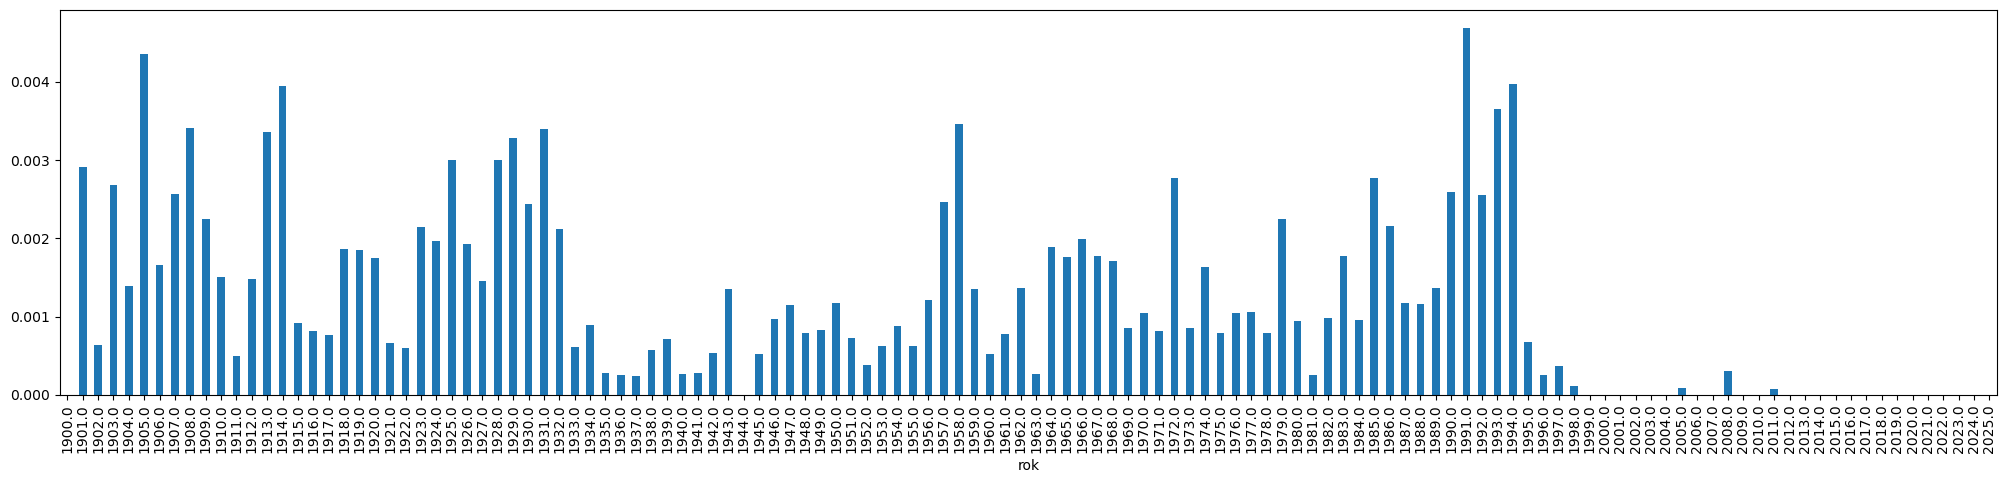

In [54]:
(df[df['245_a'].str.contains(' [Aa]neb ',na=False)].groupby('rok').size() / df.groupby('rok').size()).plot.bar(figsize=(25,5))

<Axes: xlabel='rok'>

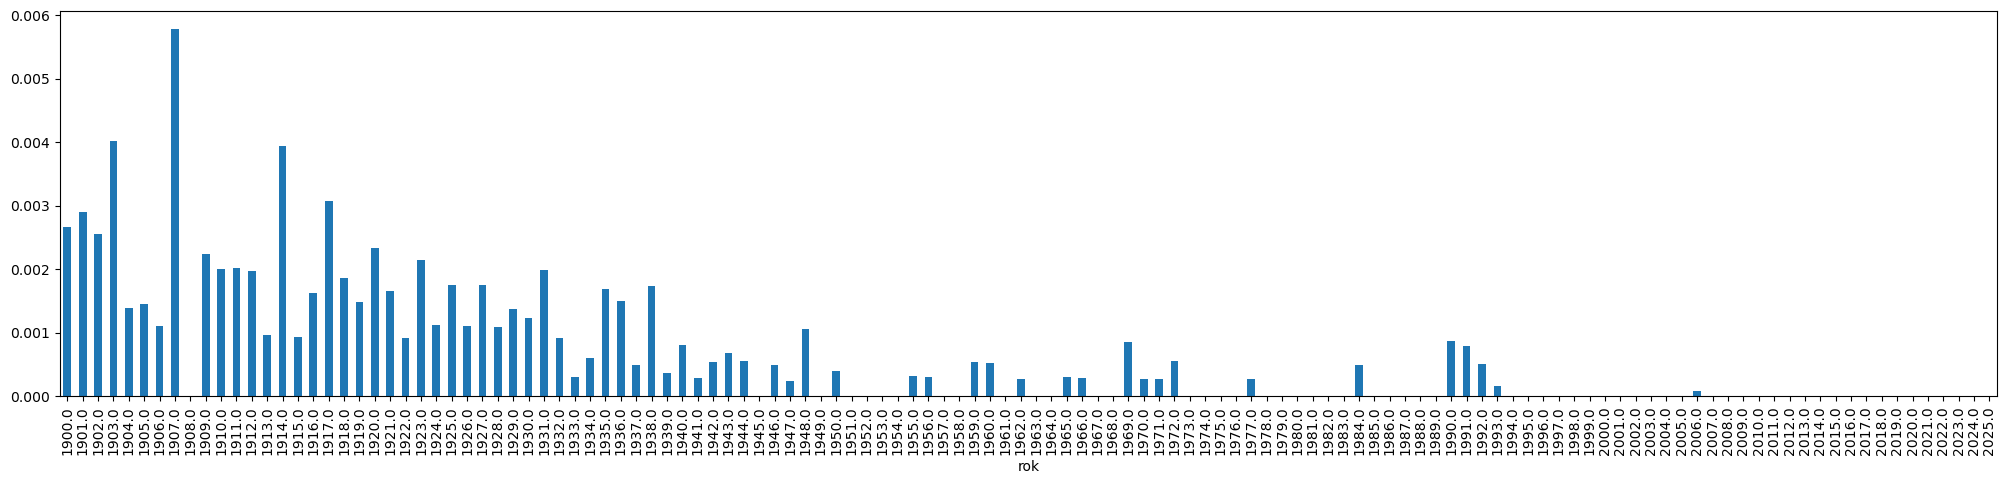

In [118]:
(df[df['245_a'].str.contains(' čili ',na=False)].groupby('rok').size() / df.groupby('rok').size()).plot.bar(figsize=(25,5))

<Axes: xlabel='rok'>

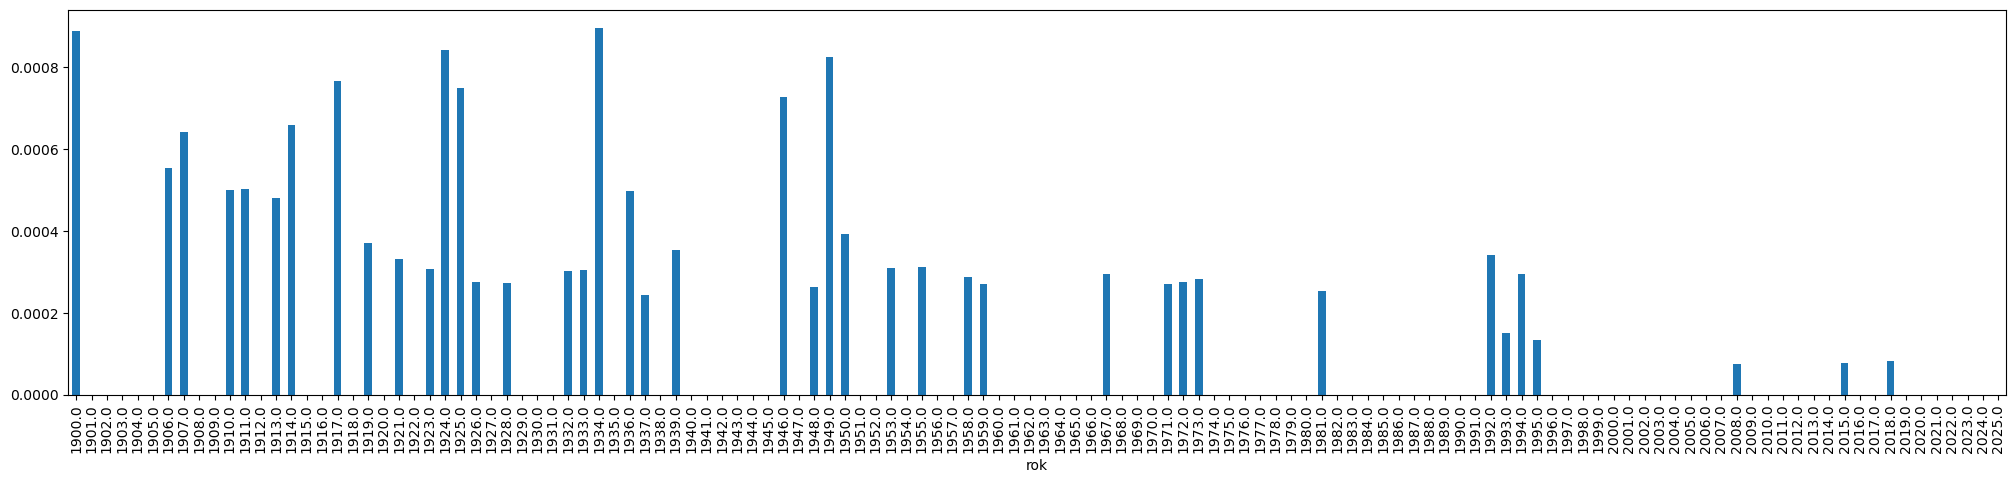

In [116]:
(df[df['245_a'].str.contains(' neboli ',na=False)].groupby('rok').size() / df.groupby('rok').size()).plot.bar(figsize=(25,5))

<Axes: xlabel='rok'>

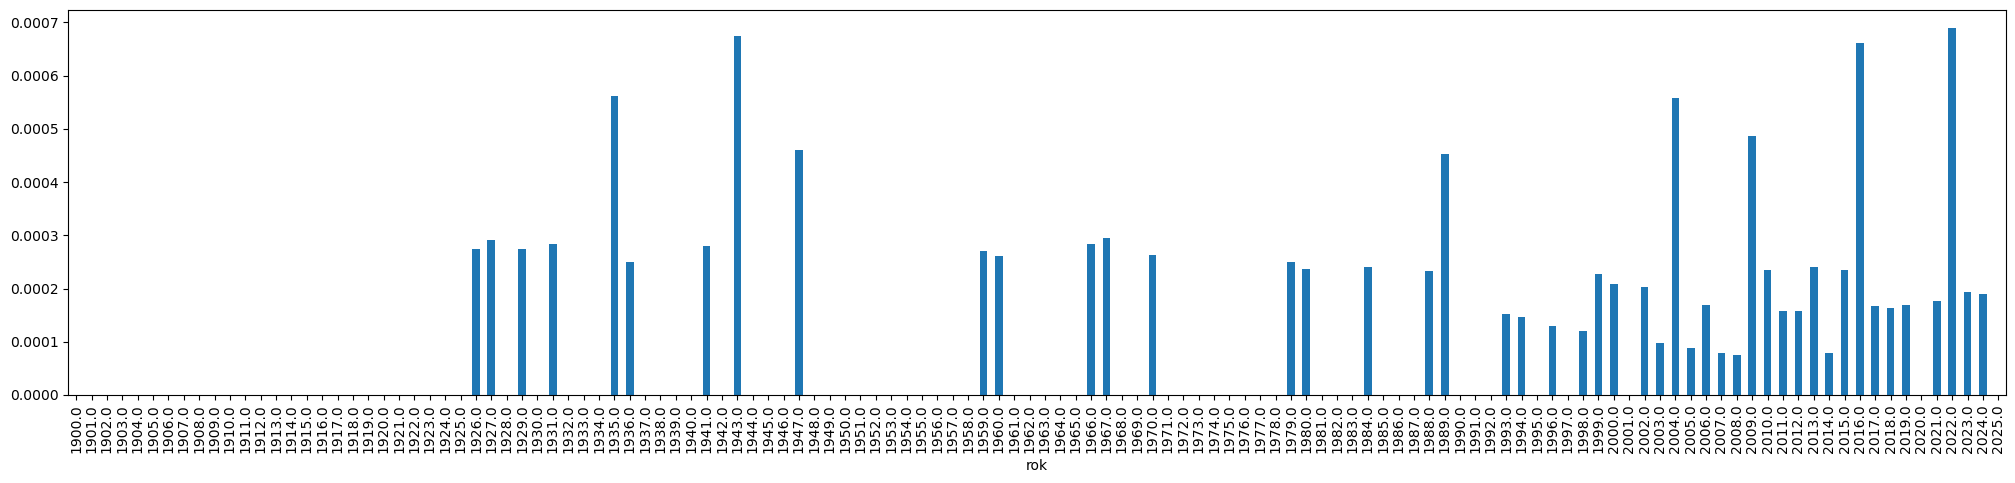

In [114]:
(df[df['245_a'].str.contains(' ani ',na=False)].groupby('rok').size() / df.groupby('rok').size()).plot.bar(figsize=(25,5))